In [1]:
import seaborn as sns
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import matplotlib.dates as dates
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import time
import xgboost as xgb
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.style as style
from xgboost import plot_importance

In [2]:
#导入数据
train=pd.read_csv('train1.csv')
test=pd.read_csv('test1.csv')
data=pd.read_csv('interpolation data.csv')
data.head()

,BJFS,BJYQ,BJSH,BJGB,TJBD,TJBH,TJWQ,HEYY,HELQ,HELY,HECC,HEZJ,HECD,HETS,SXLQ,hezj,XGB1
0,0.01502,-0.01460,-0.01518,-0.02107,-0.01494,-0.05670,-0.09392,-0.02463,-0.02155,-0.03086,-0.01620,-0.00602,-0.01941,-0.01301,-0.02615,-0.00602,-0.007801
1,0.00656,-0.01830,-0.01504,-0.02191,-0.02039,-0.06065,-0.09613,-0.03097,-0.02718,-0.03442,-0.02593,-0.01652,-0.02710,-0.01721,-0.02980,-0.01652,-0.013650
2,0.01247,-0.01197,-0.01129,-0.01348,-0.01345,-0.05397,-0.09328,-0.02190,-0.01968,-0.02785,-0.01644,-0.00888,-0.02035,-0.00989,-0.02188,-0.00888,-0.007033
3,0.01429,-0.00682,-0.01008,-0.01132,-0.01077,-0.05162,-0.09118,-0.02017,-0.01842,-0.02431,-0.01313,-0.00642,-0.01778,-0.00830,-0.01914,-0.00642,-0.003824
4,0.01597,-0.00698,-0.00759,-0.00943,-0.00980,-0.05181,-0.08622,-0.01949,-0.01651,-0.02336,-0.01223,-0.00565,-0.01818,-0.00585,-0.01741,-0.00565,-0.004662


In [3]:
data.head()

,BJFS,BJYQ,BJSH,BJGB,TJBD,TJBH,TJWQ,HEYY,HELQ,HELY,HECC,HEZJ,HECD,HETS,SXLQ,hezj,XGB1
0,0.01502,-0.01460,-0.01518,-0.02107,-0.01494,-0.05670,-0.09392,-0.02463,-0.02155,-0.03086,-0.01620,-0.00602,-0.01941,-0.01301,-0.02615,-0.00602,-0.007801
1,0.00656,-0.01830,-0.01504,-0.02191,-0.02039,-0.06065,-0.09613,-0.03097,-0.02718,-0.03442,-0.02593,-0.01652,-0.02710,-0.01721,-0.02980,-0.01652,-0.013650
2,0.01247,-0.01197,-0.01129,-0.01348,-0.01345,-0.05397,-0.09328,-0.02190,-0.01968,-0.02785,-0.01644,-0.00888,-0.02035,-0.00989,-0.02188,-0.00888,-0.007033
3,0.01429,-0.00682,-0.01008,-0.01132,-0.01077,-0.05162,-0.09118,-0.02017,-0.01842,-0.02431,-0.01313,-0.00642,-0.01778,-0.00830,-0.01914,-0.00642,-0.003824
4,0.01597,-0.00698,-0.00759,-0.00943,-0.00980,-0.05181,-0.08622,-0.01949,-0.01651,-0.02336,-0.01223,-0.00565,-0.01818,-0.00585,-0.01741,-0.00565,-0.004662


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BJFS,1095.0,0.016494,0.008214,-0.005990,0.010755,0.016450,0.021495,0.040830
BJYQ,1095.0,-0.005176,0.007886,-0.033820,-0.010575,-0.005630,-0.000410,0.025220
BJSH,1095.0,-0.005894,0.008051,-0.031140,-0.011385,-0.006320,-0.000790,0.029060
BJGB,1095.0,-0.008850,0.007535,-0.033050,-0.013920,-0.008950,-0.003940,0.013920
TJBD,1095.0,-0.010126,0.007556,-0.032700,-0.014970,-0.009965,-0.005565,0.016370
TJBH,1095.0,-0.080938,0.016054,-0.121030,-0.090955,-0.081810,-0.068910,-0.046500
TJWQ,1095.0,-0.158170,0.036893,-0.240410,-0.185785,-0.159835,-0.131795,-0.053660
HEYY,1095.0,-0.020078,0.007242,-0.048680,-0.024465,-0.020220,-0.016050,0.016940
HELQ,1095.0,-0.013442,0.009011,-0.041270,-0.020225,-0.013730,-0.007315,0.014100
HELY,1095.0,-0.024350,0.007234,-0.049520,-0.029045,-0.024435,-0.019840,0.000210


In [5]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
BJFS,365.0,0.020182,0.009332,-0.005990,0.015020,0.020480,0.026850,0.040830
BJYQ,365.0,-0.001489,0.008326,-0.023680,-0.007180,-0.002220,0.004110,0.023740
BJSH,365.0,-0.001657,0.007929,-0.031140,-0.006320,-0.002130,0.003130,0.017530
BJGB,365.0,-0.004995,0.007756,-0.025550,-0.009990,-0.005660,0.000680,0.013920
TJBD,365.0,-0.006113,0.007815,-0.032700,-0.010540,-0.006660,-0.000510,0.010960
TJBH,365.0,-0.095941,0.010908,-0.121030,-0.105190,-0.094540,-0.087360,-0.071620
TJWQ,365.0,-0.196170,0.019407,-0.240410,-0.209250,-0.194470,-0.183380,-0.159835
HEYY,365.0,-0.017655,0.008419,-0.048680,-0.022250,-0.018670,-0.012980,0.016940
HELQ,365.0,-0.005710,0.007246,-0.030430,-0.010390,-0.005970,-0.001000,0.014100
HELY,365.0,-0.022059,0.007898,-0.049520,-0.026700,-0.022730,-0.016460,-0.002890


In [6]:
train_x=data.drop(['HEZJ'],axis=1)
target=data['HEZJ']
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BJFS    1095 non-null   float64
 1   BJYQ    1095 non-null   float64
 2   BJSH    1095 non-null   float64
 3   BJGB    1095 non-null   float64
 4   TJBD    1095 non-null   float64
 5   TJBH    1095 non-null   float64
 6   TJWQ    1095 non-null   float64
 7   HEYY    1095 non-null   float64
 8   HELQ    1095 non-null   float64
 9   HELY    1095 non-null   float64
 10  HECC    1095 non-null   float64
 11  HECD    1095 non-null   float64
 12  HETS    1095 non-null   float64
 13  SXLQ    1095 non-null   float64
 14  hezj    1095 non-null   float64
 15  XGB1    1095 non-null   float64
dtypes: float64(16)
memory usage: 137.0 KB


In [7]:
model=xgb.XGBRegressor(max_depth=6
                      ,learning_rate=0.3
                      ,n_estimators=100)
oof1 = np.zeros(len(train_x))
answers = []
score = 0
n_fold = 5
num_epochs = 100
folds = KFold(n_splits=n_fold, shuffle=True,random_state=2000) #2020 #1000
for fold_n, (train_index, valid_index) in enumerate(folds.split(train_x)):
    X_train=train.drop(['HEZJ'],axis=1)
    X_valid=test.drop(['HEZJ'],axis=1)
    y_train=train['HEZJ']
    y_valid=test['HEZJ']
    model.fit(X_train,y_train,eval_set=[(X_valid, y_valid)],verbose=100,early_stopping_rounds=200)
    y_pre = model.predict(X_valid)

[0]	validation_0-rmse:0.34715
[99]	validation_0-rmse:0.00354
[0]	validation_0-rmse:0.34715
[99]	validation_0-rmse:0.00354
[0]	validation_0-rmse:0.34715
[99]	validation_0-rmse:0.00354
[0]	validation_0-rmse:0.34715
[99]	validation_0-rmse:0.00354
[0]	validation_0-rmse:0.34715
[99]	validation_0-rmse:0.00354


<ipython-input-8-b197b9996271>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(range(len( y_pre)),  y_pre, label='fit', lineWidth=5)
<ipython-input-8-b197b9996271>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(range(len(target)), target, label='true', lineWidth=5)


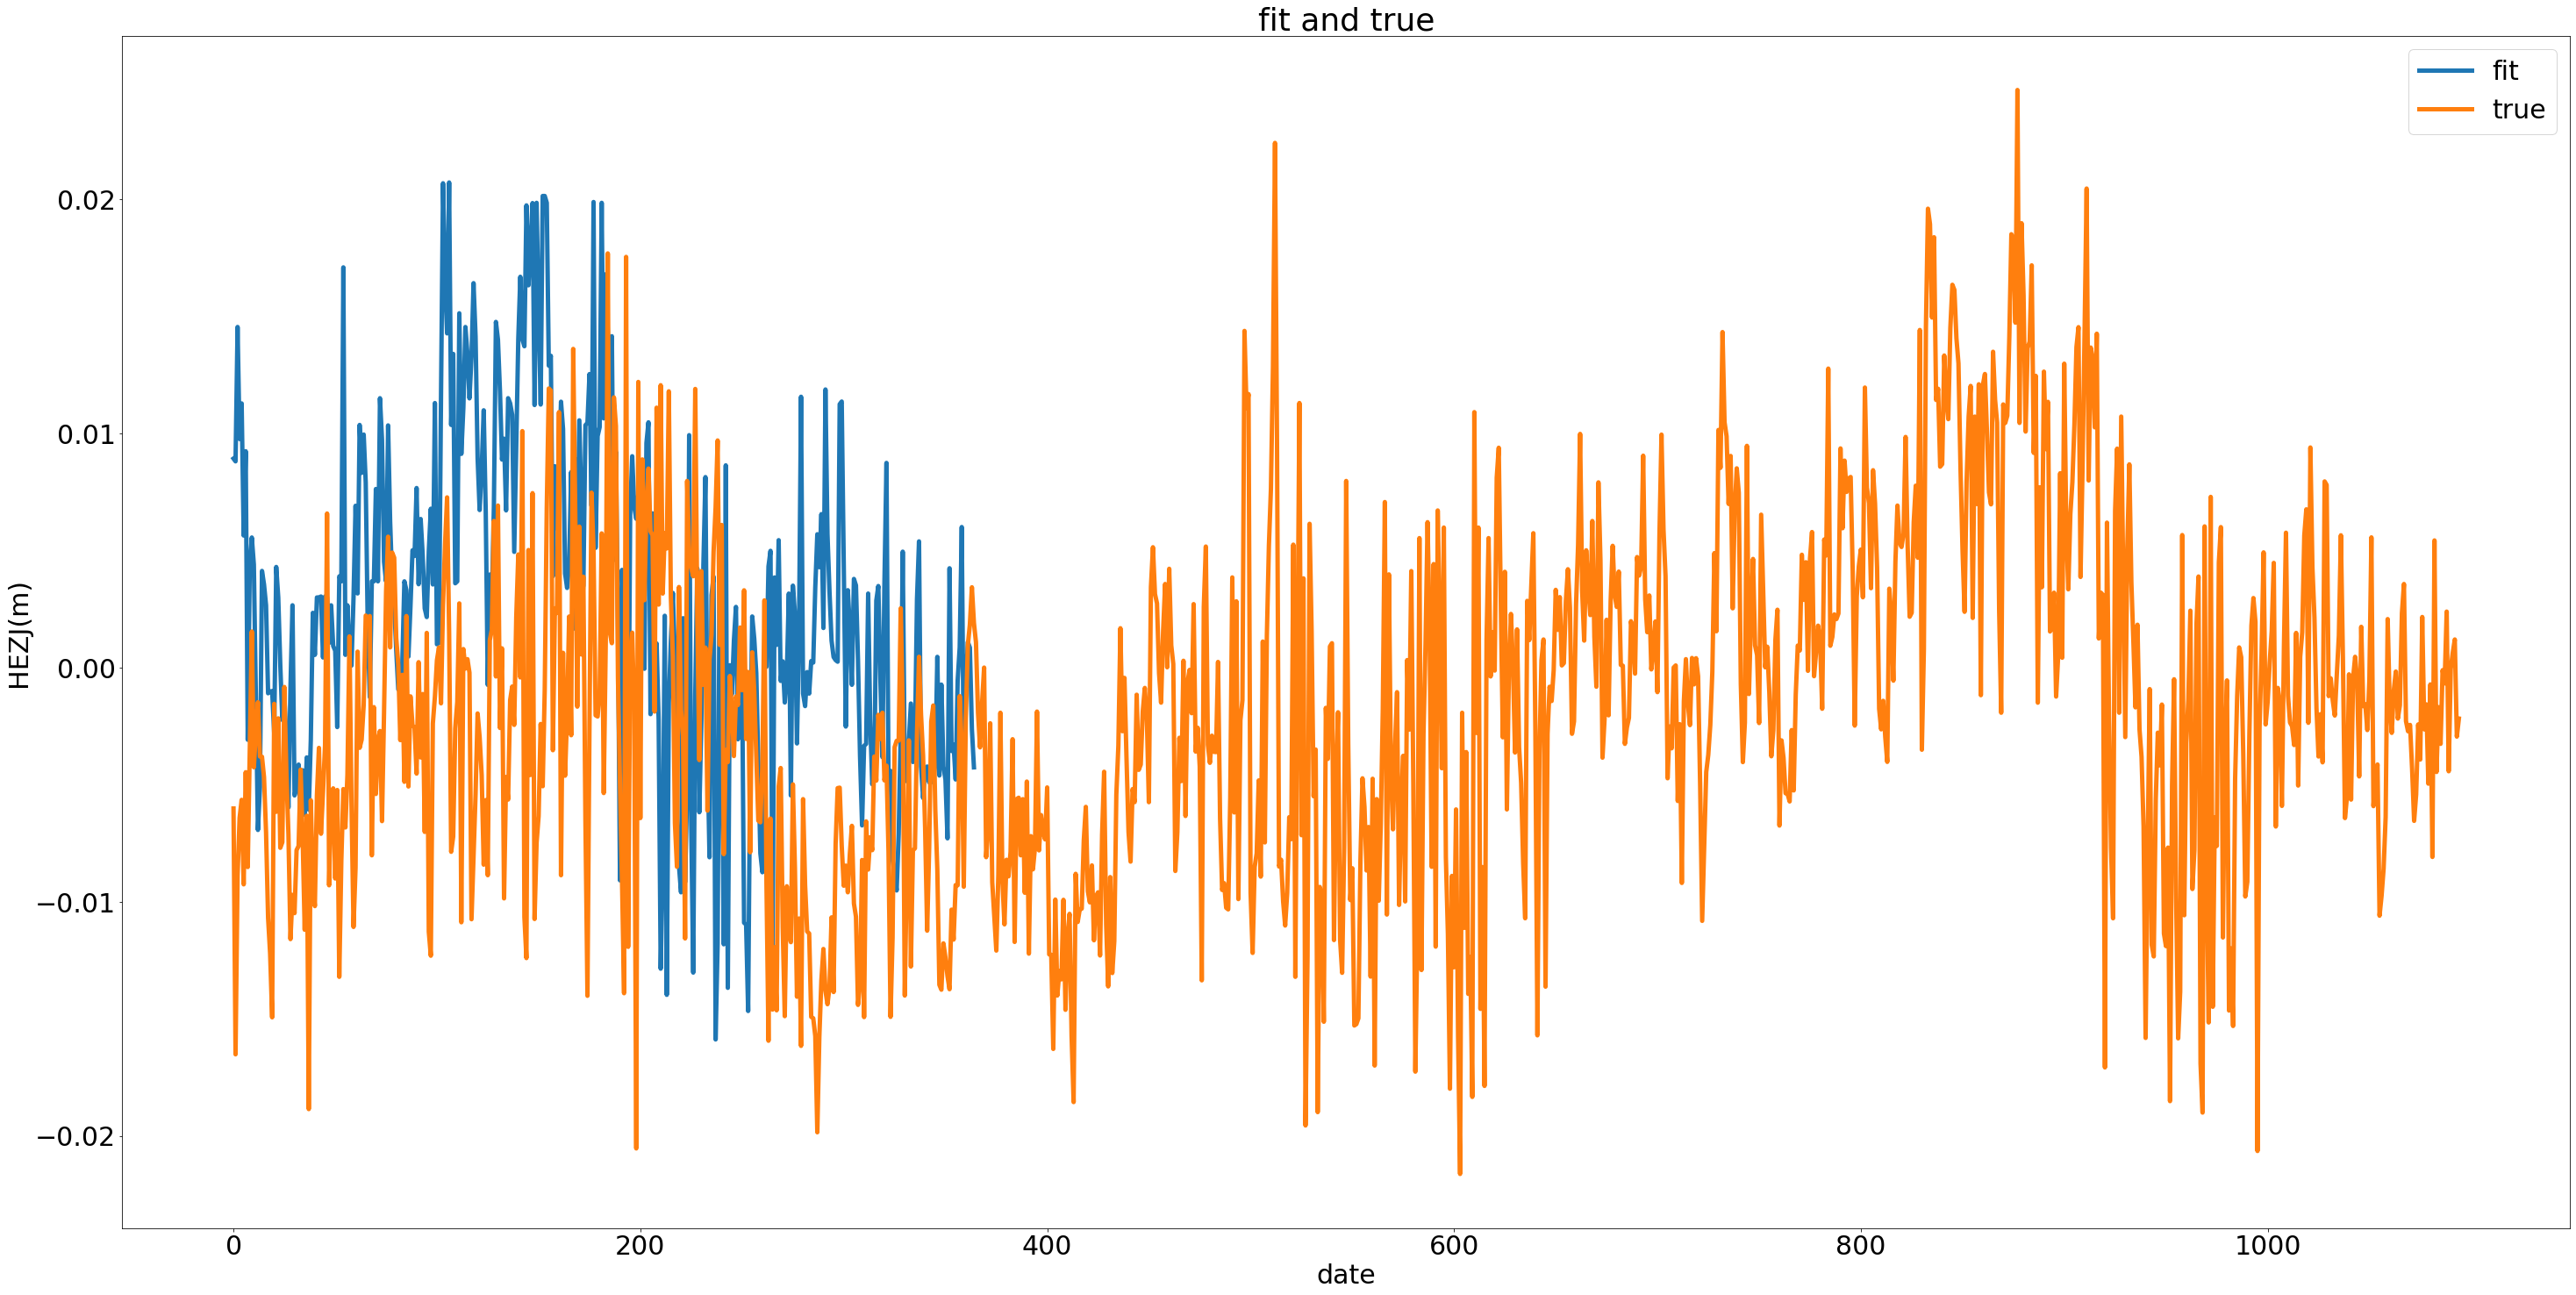

In [8]:
plt.figure(figsize=(50, 25))
plt.rcParams.update({'font.size': 30})
plt.plot(range(len( y_pre)),  y_pre, label='fit', lineWidth=5)
plt.plot(range(len(target)), target, label='true', lineWidth=5)
plt.ylabel('HEZJ(m)')
plt.xlabel('date')
plt.legend()
plt.title("fit and true")
plt.show()

In [9]:
df = pd.DataFrame(y_pre)
df.to_csv('xgb1.csv')